# California Housing Data

The objective of this execice is to build a linear model to predict the homes price given a set of feature. 

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Features
* MedInc median income in block group
* HouseAge median house age in block group
* AveRooms average number of rooms per household
* AveBedrms average number of bedrooms per household
* Population block group population
* AveOccup average number of household members
* Latitude block group latitude
* Longitude block group longitude

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

Worked Example: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

## Import libraries

Libraries needed for this exercice.

In [1]:
import numpy as np

import pandas as pd

from pandas import read_csv

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load the dataset

We will import the housing data from the scikit-learn library. The data comes in the form of a dictionary-like object.

a) How many lines and column does this dataset have ? Show the first 5 examples.

b) Check there are no missing values. For this use `isnull().sum()` function.

In [2]:
#Get dataset
housing = fetch_california_housing(as_frame=True)

In [3]:
# a)

print('data dimensions: ', housing['frame'].shape)

# Show first examples
housing['frame'].head()


data dimensions:  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Print names of features and target
print('Features:', housing.feature_names)

print('Target:', housing.target_names)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [5]:
# b) check missing values
housing['frame'].isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 2. Data exploration

We first assign features values to numpy array $X$ and target values to numpy array $y$

a) check the dimension of $X$ and $y$

b) Make histograms for each features and for the target

c) Show scatter plots of each feature vs the target (optional: calculate correlation coefficient)

In [6]:
# Get data
X = housing.data.to_numpy()   # Features
y = housing.target.to_numpy() # Target

# a) X and y dimensions
print("Features: ",X.shape,"Target:",y.shape)

Features:  (20640, 8) Target: (20640,)


data features


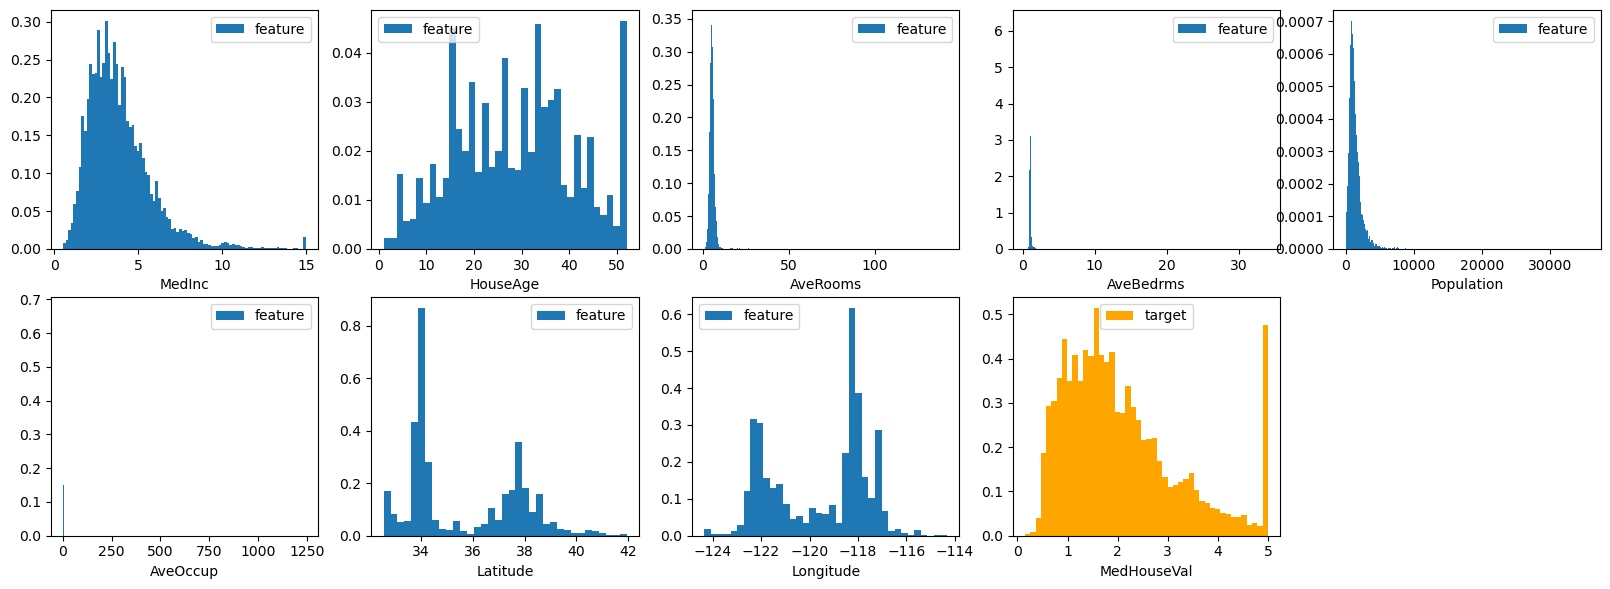

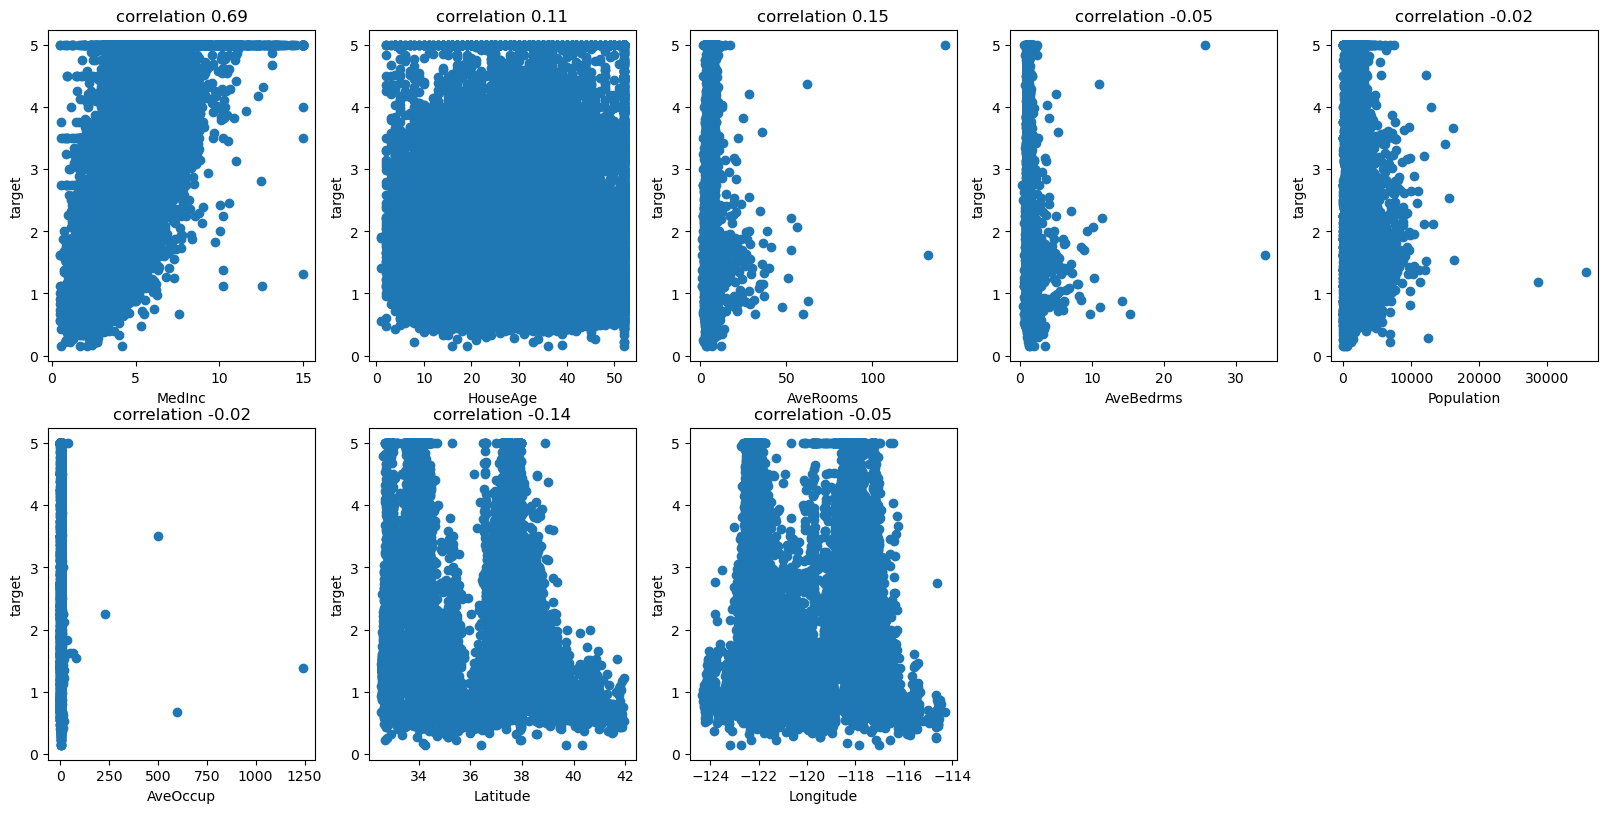

In [7]:
# b) Show histograms
print("data features")
plt.figure(figsize=(20, 18))
for i in range(X.shape[1]+1):
    plt.subplot(5, 5, i+1)
    if (i==X.shape[1]):
        plt.hist(y,bins='auto', label='target', color='orange', density=1)
        plt.xlabel('%s' % housing.target_names[0])        
    else:
        n, bins, patches = plt.hist(X[:,i], bins='auto', label='feature', density=1)
        plt.xlabel('%s' %housing.feature_names[i])
    #plt.hist(x_test[:,i], bins, alpha=0.5, label='Test', density=1)
    plt.legend(loc='best')

# c) Scatter plots
plt.figure(figsize=(20, 25))
for i in range(X.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.scatter(X[:,i],y)
    #plt.hist(x_test[:,i], bins, alpha=0.5, label='Test', density=1)
    plt.xlabel('%s' %housing.feature_names[i])
    plt.ylabel("target")
    cor = np.corrcoef(X[:,i],y)[0,1]
    plt.title('correlation %.2f' % cor)

In [8]:
def makeplots(y,ypred):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y,ypred)
    plt.xlabel('y true')
    plt.ylabel('y pred')
    xx=np.linspace(0,6,50)
    plt.plot(xx,xx,'k-')

    plt.subplot(1, 2, 2)
    mean = np.mean(y-ypred)
    std = np.std(y-ypred)
    n, bins, _ = plt.hist(y-ypred,bins='auto', label='mean = %.3f, std = %.3f' %(mean,std), density=1)
    plt.xlabel('y true - y pred')
    #_ = plt.hist(ypred,bins=bins, label='y pred', density=1)
    plt.legend()

# 3. Split data in train and test samples

We now split the total dataset in a train and a test sample using scikit-learn.

Look at the size of each sample.

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

print('Features: Train size: ',X_train.shape,'Test size: ',X_test.shape)
print('Target: Train size: ',y_train.shape,'Test size: ',y_test.shape)

Features: Train size:  (14448, 8) Test size:  (6192, 8)
Target: Train size:  (14448,) Test size:  (6192,)


# 4. Linear regression

Now let's construct a predictive model using linear regression:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i$$

For this we use the scikit-learn model described here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

a) Fit the linear regression model using the training dataset and print the parameters (weights and bias term) of the fit.

b) Get the predicted model output, `y_train_pred`, using the training dataset. Make a scatter plot of the true target value, `y_train`, vs the predicted value, `y_train_pred`. Then, plot the difference `(y_train - y_train_pred)` in a histogram.

c) Calculate the root mean square error (RMS) between `y_train` and `y_train_pred`. For this you can use the scikit-learn function `mean_squared_error()`.

d) Finally we apply the model to the test dataset: repeat steps b) and c) with the test sample. Do you think that the model is acceptable ? Is there an overfitting problem ?

Fitted weights: 
 [ 4.53053771e-01  1.01139824e-02 -1.30682277e-01  8.47640845e-01
 -3.48804147e-06 -3.35207458e-03 -4.23235312e-01 -4.37132608e-01]
Bias term: -37.3622661064087

Train sample: RMS = 0.724, R2 Score: 0.610

Test sample: RMS = 0.730, R2 Score: 0.591


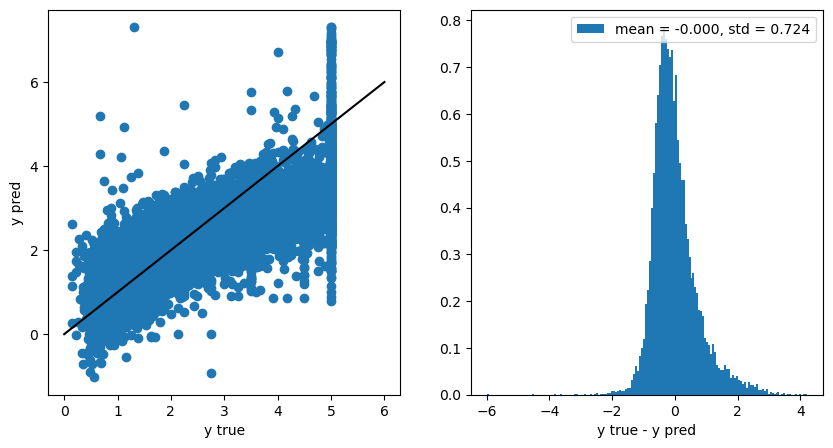

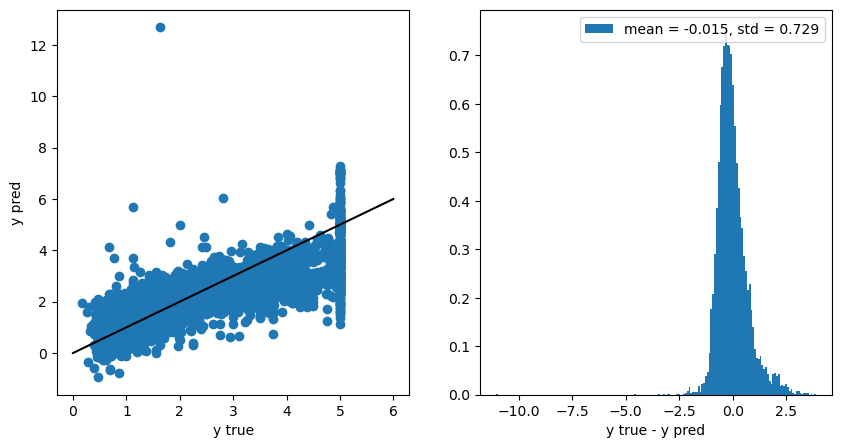

In [10]:
# Fit of the model
model1 = LinearRegression()
reg = model1.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)


# 5. Ridge penalty (a.k.a L2 norm)

Let's see if a penalized linear algorithm can improve the modelling and prediction of the data. For this we use Ridge regression (also called L2 norm) which adds a penalty term to the fit model:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i + \lambda \sum_{i=0}^{N=13} w_i^2$$

See the scikit-learn implementation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

a) Train the model using the training dataset and a $\lambda$ regularization parameter =1

b) Apply the algorithm to the test data and check the quality of the model. Do you see any improvement in the data modelling and prediction ? Try other values of $\lambda$.

c) Optional, try Lasso penalty: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html. Does it help ?

Fitted weights: 
 [ 4.52845120e-01  1.01163013e-02 -1.30293421e-01  8.45437310e-01
 -3.48316349e-06 -3.35150502e-03 -4.23237465e-01 -4.37109000e-01]
Bias term: -37.3583293585333

Train sample: RMS = 0.724, R2 Score: 0.610

Test sample: RMS = 0.730, R2 Score: 0.591


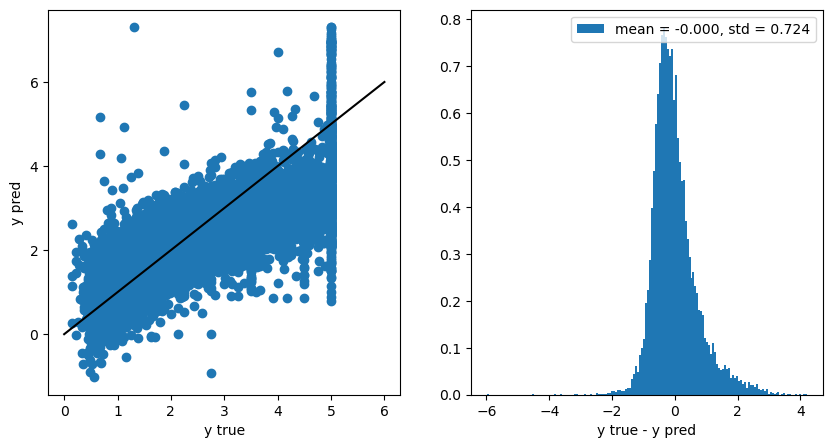

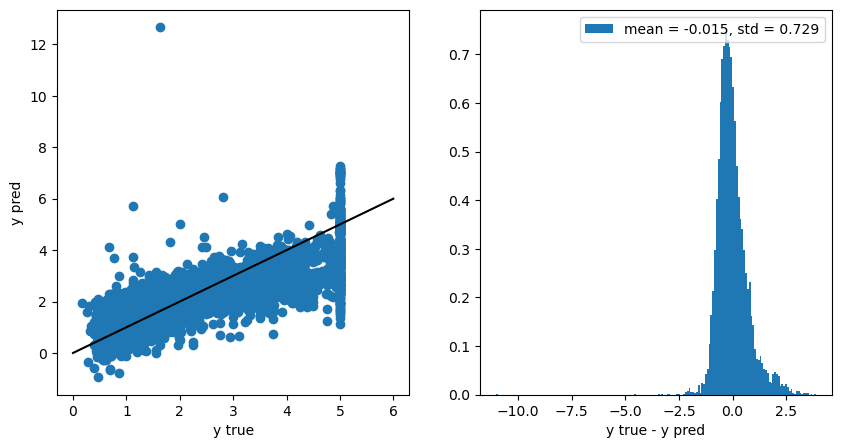

In [11]:
# define model
model2 = Ridge(alpha=1) # Alpha sets the lambda (yes...) hyperparameter 
reg = model2.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)


# Lasso (a.k.a L1 norm)

Fitted weights: 
 [ 3.92312504e-01  1.55686675e-02 -0.00000000e+00  0.00000000e+00
  1.45263182e-05 -3.06600750e-03 -1.16728543e-01 -1.01565593e-01]
Bias term: -7.886815122214057

Train sample: RMS = 0.783, R2 Score: 0.544

Test sample: RMS = 0.764, R2 Score: 0.551


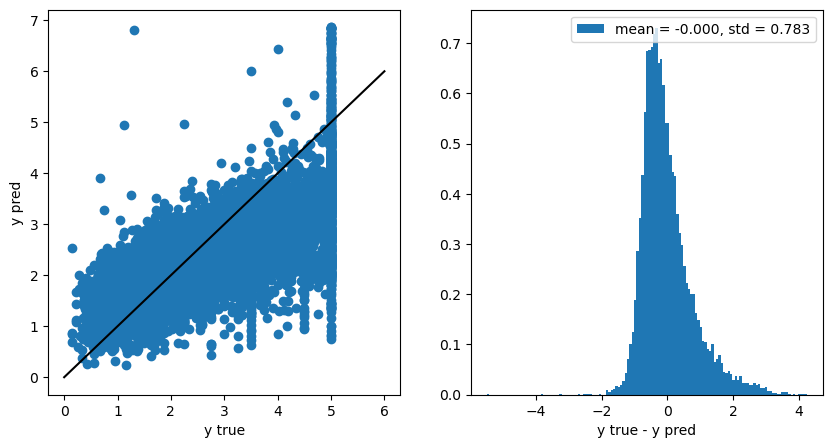

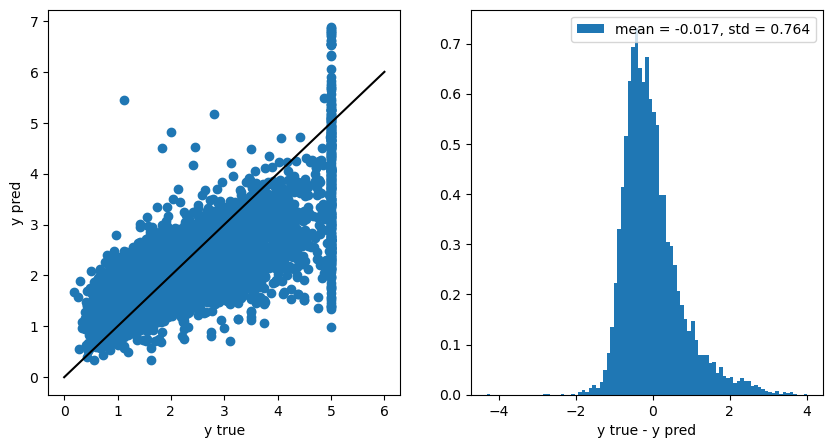

In [12]:
# Fit of the model
model3 = Lasso(alpha=0.1)
reg = model3.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)

## 6. Estimating model performance: Cross-validation

Instead of splitting the dataset in one training and one test samples we can use cross-validation to better determine the performance of a fit model. For this we apply the following [procedure](https://machinelearningmastery.com/k-fold-cross-validation/):
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
  - Take the group as test data set
  - Take the k-1 remaining groups as a training data set
  - Fit a model on the training set and evaluate it on the test set
  - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

a) Look at the example below, what are the different parameters ? To what corresponds the output ?

b) Apply the cross-validation to the other models. Can you say if one is more performant than the other ?


In [13]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

Mean RMS: 0.75 +- 0.04


## 7. Optional: Improve the model ?

A much better result can be achieved by pre-processing the data and adding some non-linerity to the model with using a neural network 

a) First, standardize all features by removing the mean and scaling to unit variance using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

b) Try to implement a neural network with [Multi-layer Perceptron regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor). For example, two hidden layers with 100 and 50 neurons each and relu activation function does a decent job.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit (get min and max) and transform x_train
X_train = scaler.fit_transform(X_train)

# transform x_test (using scale parameters of x_train)
X_test = scaler.transform(X_test)


Train sample: RMS = 0.457, R2 Score: 0.845

Test sample: RMS = 0.522, R2 Score: 0.791


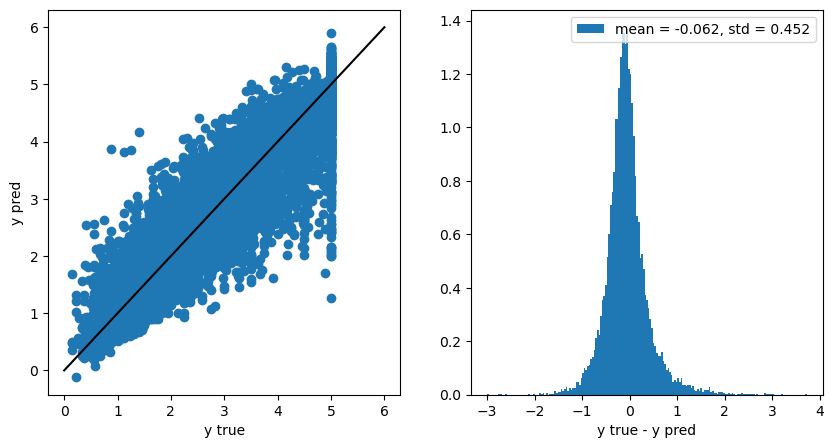

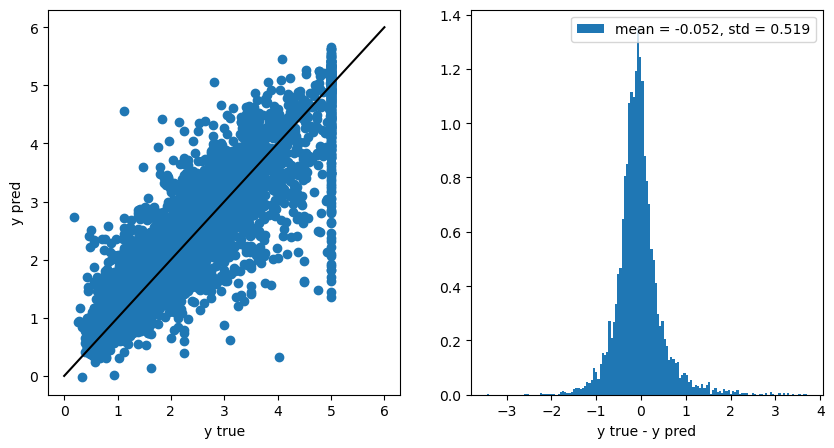

In [15]:
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',max_iter=400)

# Fit of the model
reg = model4.fit(X_train, y_train)

# Train sample
y_train_pred = reg.predict(X_train) # Predicted targets

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('\nTrain sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_train,y_train_pred)),reg.score(X_train, y_train)))

# Same for: Test sample
y_test_pred = reg.predict(X_test)

print('\nTest sample: RMS = %.3f, R2 Score: %.3f' 
      % (np.sqrt(mean_squared_error(y_test,y_test_pred)),reg.score(X_test, y_test)))

makeplots(y_test,y_test_pred)

In [16]:
# Print parameters
print('Fitted weights: \n',reg.coefs_)
print('Bias term:',reg.intercepts_)

Fitted weights: 
 [array([[-5.44396525e-02, -1.04769635e-01, -5.45134974e-02,
        -2.81602630e-02,  1.78048711e-02, -1.47075720e-01,
         1.19078607e-02, -2.27353709e-01,  1.21120207e-01,
         1.24012364e-01,  1.54684690e-01,  2.39430151e-01,
        -2.51870061e-01,  1.27279321e-01, -1.27261937e-01,
         1.87558305e-01, -1.48611413e-01,  5.45981586e-02,
        -5.31877356e-02, -1.74014247e-01, -3.76651154e-01,
        -2.33299295e-01,  1.74410885e-01, -5.60935538e-02,
        -1.46060788e-01, -3.43992438e-02, -1.75044189e-01,
         2.51773331e-01,  1.32619078e-01,  1.66873637e-01,
         1.92135200e-02, -2.52127335e-01,  2.25183102e-01,
        -3.70448734e-01,  2.62937912e-01,  2.44506377e-01,
        -8.02142541e-02,  3.82482865e-02,  9.17416011e-03,
        -2.71431958e-01,  8.03480737e-02, -1.55829504e-01,
        -2.58174521e-01, -1.51722631e-01, -7.06576465e-02,
         2.28023179e-01,  2.19586538e-02,  6.55476970e-02,
         1.73154332e-01,  2.11249159e